In [ ]:
import pandas as pd  # импорт библиотеки pandas

In [ ]:
import numpy as np  # импорт библиотеки numpy

In [ ]:
from matplotlib import pyplot as plt  # импорт библиотеки matplotlib

# 1. Найти готовый файл с данными (не менее 1000 строк, минимум 3 поля — числовые).

Ссылка https://www.kaggle.com/gmadevs/wta-matches?select=wta_matches_2000.csv

Данные о теннисных матчах Женской Ассоциации Тенниса за 2000 год

In [ ]:
from google.colab import files  # загрузка файла, называется "wta_matches_2000.csv"
uploaded = files.upload()

Saving wta_matches_2000.csv to wta_matches_2000.csv


In [ ]:
df = pd.read_csv('wta_matches_2000.csv')  # формирование датафрейма из файла

In [ ]:
df.info()  # вывод информации

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2882
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tourney_id                    2575 non-null   object 
 1   tourney_name                  2575 non-null   object 
 2   surface                       2575 non-null   object 
 3   draw_size                     2575 non-null   int64  
 4   tourney_level                 2575 non-null   object 
 5   tourney_date                  2575 non-null   int64  
 6   match_num                     2575 non-null   int64  
 7   winner_id                     2575 non-null   int64  
 8   winner_seed                   1118 non-null   float64
 9   winner_entry                  299 non-null    object 
 10  winner_name                   2575 non-null   object 
 11  winner_hand                   2575 non-null   object 
 12  winner_ht                     1008 non-null   float64
 13  win

In [ ]:
df.dropna(subset = ['winner_rank', 'loser_rank', 'winner_rank_points', 'loser_rank_points'],
inplace = True)  # удаление строк с пропусками в столбцах из списка

In [ ]:
df.columns  # названия столбцов

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round'],
      dtype='object')

In [ ]:
df.shape  # размеры датафрейма

(2575, 30)

In [ ]:
df.dtypes  # типы значений в столбцах

tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
winner_rank           float64
winner_rank_points    float64
loser_id                int64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
loser_rank            float64
loser_rank_points     float64
score                  object
best_of                 int64
round                  object
dtype: object

In [ ]:
df.info()  # вывод информации об измененном датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2882
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          2575 non-null   object 
 1   tourney_name        2575 non-null   object 
 2   surface             2575 non-null   object 
 3   draw_size           2575 non-null   int64  
 4   tourney_level       2575 non-null   object 
 5   tourney_date        2575 non-null   int64  
 6   match_num           2575 non-null   int64  
 7   winner_id           2575 non-null   int64  
 8   winner_seed         1118 non-null   float64
 9   winner_entry        299 non-null    object 
 10  winner_name         2575 non-null   object 
 11  winner_hand         2575 non-null   object 
 12  winner_ht           1008 non-null   float64
 13  winner_ioc          2575 non-null   object 
 14  winner_age          2575 non-null   float64
 15  winner_rank         2575 non-null   float64
 16  winner

In [ ]:
df.head()  # первые 5 строк датафрейма

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round
0,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,1,200001,1.0,NaN,Martina Hingis,R,170.0,SUI,19.296372,1.0,6003.0,200002,NaN,NaN,Mirjana Lucic,R,NaN,CRO,17.859001,49.0,640.0,6-1 6-2,3,R128
1,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,2,200003,NaN,NaN,Justine Henin,R,167.0,BEL,17.629021,63.0,510.0,200004,NaN,Q,Kerry Anne Guse,R,NaN,AUS,27.118412,133.0,199.0,6-4 6-2,3,R128
2,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,3,200006,NaN,NaN,Karina Habsudova,R,NaN,SVK,26.458590,53.0,574.0,200005,NaN,NaN,Jolene Watanabe Giltz,R,NaN,USA,31.378508,118.0,243.0,6-0 6-1,3,R128
3,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,4,200008,NaN,NaN,Alicia Molik,R,182.0,AUS,18.970568,116.0,245.0,200007,NaN,NaN,Silvija Talaja,R,NaN,CRO,22.006845,23.0,1112.0,6-1 5-7 7-5,3,R128
4,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,5,200009,NaN,NaN,Tamarine Tanasugarn,R,165.0,THA,22.650240,72.0,439.0,200010,NaN,NaN,Rita Grande,R,NaN,ITA,24.821355,60.0,516.0,6-3 6-4,3,R128


In [ ]:
df.tail()  # последние 5 строк датафрейма

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round
2872,2000-D206,Fed Cup G1 RRA: HKG vs IND,Hard,4,D,20000429,2,200743,NaN,NaN,Nirupama Sanjeev,R,NaN,IND,23.375770,224.0,92.0,202774,NaN,NaN,Ka Po Tong,U,NaN,HKG,19.104723,460.0,23.0,6-1 7-5,3,RR
2874,2000-D207,Fed Cup G1 RRA: JPN vs HKG,Hard,4,D,20000427,2,201085,NaN,NaN,Shinobu Asagoe,R,NaN,JPN,23.822040,126.0,205.0,202774,NaN,NaN,Ka Po Tong,U,NaN,HKG,19.104723,460.0,23.0,6-1 6-1,3,RR
2878,2000-D209,Fed Cup G1 RRA: HKG vs THA,Hard,4,D,20000428,2,200009,NaN,NaN,Tamarine Tanasugarn,R,165.0,THA,22.918549,62.0,542.0,202774,NaN,NaN,Ka Po Tong,U,NaN,HKG,19.104723,460.0,23.0,6-3 6-4,3,RR
2880,2000-D210,Fed Cup G1 RRB: INA vs KOR,Hard,4,D,20000426,2,201295,NaN,NaN,Wynne Prakusya,R,NaN,INA,18.995209,170.0,138.0,201313,NaN,NaN,Yoon Jeong Cho,R,NaN,KOR,21.062286,230.0,87.0,3-6 7-6(4) 6-4,3,RR
2882,2000-D211,Fed Cup G1 RRB: INA vs NZL,Hard,4,D,20000425,2,201295,NaN,NaN,Wynne Prakusya,R,NaN,INA,18.995209,170.0,138.0,201754,NaN,NaN,Leanne Baker,L,NaN,NZL,19.290897,325.0,50.0,6-2 7-6(7),3,RR


# 2. Посчитать статистические показатели: - медиана, - мода, - средняя, - минимум, - максимум.

Работаем со столбцом "winner_rank_points"

In [ ]:
df['winner_rank_points'].median()  # подсчет медианы

745.0

In [ ]:
df['winner_rank_points'].mode()  # подсчет моды

0    347.0
dtype: float64

In [ ]:
df['winner_rank_points'].mean()  # подсчет среднего

1185.827572815534

In [ ]:
df['winner_rank_points'].min()  # подсчет минимума

2.0

In [ ]:
df['winner_rank_points'].max()  # подсчет максимума

6145.0

# 3. Создать новый столбец, в котором разместить разницу между максимумом и текущим значением для некоторого числового параметра.

Работаем со столбцом "winner_rank_points", новый столбец "max_minus_winner_rank_points"

In [ ]:
# создаем столбец в соответствии с заданием
df['max_minus_winner_rank_points'] = df['winner_rank_points'].max() - df['winner_rank_points']

In [ ]:
df.info()  # выводим информацию, чтобы проверить

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2882
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tourney_id                    2575 non-null   object 
 1   tourney_name                  2575 non-null   object 
 2   surface                       2575 non-null   object 
 3   draw_size                     2575 non-null   int64  
 4   tourney_level                 2575 non-null   object 
 5   tourney_date                  2575 non-null   int64  
 6   match_num                     2575 non-null   int64  
 7   winner_id                     2575 non-null   int64  
 8   winner_seed                   1118 non-null   float64
 9   winner_entry                  299 non-null    object 
 10  winner_name                   2575 non-null   object 
 11  winner_hand                   2575 non-null   object 
 12  winner_ht                     1008 non-null   float64
 13  win

In [ ]:
df.head()  # просматриваем первые 5 строк

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,max_minus_winner_rank_points
0,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,1,200001,1.0,NaN,Martina Hingis,R,170.0,SUI,19.296372,1.0,6003.0,200002,NaN,NaN,Mirjana Lucic,R,NaN,CRO,17.859001,49.0,640.0,6-1 6-2,3,R128,142.0
1,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,2,200003,NaN,NaN,Justine Henin,R,167.0,BEL,17.629021,63.0,510.0,200004,NaN,Q,Kerry Anne Guse,R,NaN,AUS,27.118412,133.0,199.0,6-4 6-2,3,R128,5635.0
2,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,3,200006,NaN,NaN,Karina Habsudova,R,NaN,SVK,26.458590,53.0,574.0,200005,NaN,NaN,Jolene Watanabe Giltz,R,NaN,USA,31.378508,118.0,243.0,6-0 6-1,3,R128,5571.0
3,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,4,200008,NaN,NaN,Alicia Molik,R,182.0,AUS,18.970568,116.0,245.0,200007,NaN,NaN,Silvija Talaja,R,NaN,CRO,22.006845,23.0,1112.0,6-1 5-7 7-5,3,R128,5900.0
4,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,5,200009,NaN,NaN,Tamarine Tanasugarn,R,165.0,THA,22.650240,72.0,439.0,200010,NaN,NaN,Rita Grande,R,NaN,ITA,24.821355,60.0,516.0,6-3 6-4,3,R128,5706.0


# 4. Разбить данные на несколько блоков (не менее 3, приблизительно равных по размеру) по некоторому критерию (критерий определить самостоятельно).

Разбиваем данные на 3 блока в соответствии со столбцом "surface" : 'Hard'; 'Clay'; 'Grass', 'Carpet' - один блок

In [ ]:
df_surface_hard = df[df['surface'] == 'Hard']  # твердое покрытие (хард)

In [ ]:
df_surface_clay = df[df['surface'] == 'Clay']  # грунтовое покрытие

In [ ]:
df_surface_grass = df[df['surface'] == 'Grass']  # травяное покрытие
df_surface_carpet = df[df['surface'] == 'Carpet']  # ковровое (синтетическое) покрытие
df_surface_grass_or_carpet = df_surface_grass.append(df_surface_grass)  # травяное + ковровое

# 5. Привести круговую диаграмму для проделанного разбиения.

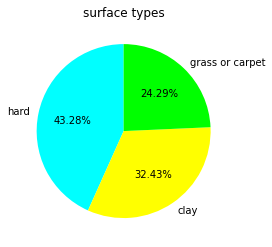

In [ ]:
labels_ = ['hard', 'clay', 'grass or carpet']  # метки - типы поверхностей
# секции - количество строк в соответствующей таблице
sections_ = [df_surface_hard.shape[0], df_surface_clay.shape[0], df_surface_grass_or_carpet.shape[0]]
colors_ = ['cyan', 'yellow', (0, 1, 0)]

plt.pie(sections_, labels=labels_, colors=colors_,
        startangle=90,
        autopct='%1.2f%%')

plt.title('surface types')
plt.show()

# 6. В зависимости от особенностей набора данных для каждого блока построить график (гистограмму, ...).

По каждому типу покрытия высчитывается доля проведенных соревновой в месяц (в процентах от общего количества), строится гистограмма

In [ ]:
# список долей покрытия хард по месяцам
lst_by_month_surface_hard = []
# количество строк в таблице с покрытием хард за все месяцы
amount_surface_hard = df_surface_hard.shape[0]
# цикл по месяцам
for i in range(1, 13):
  # таблица - покрытие хард, i-й месяц
  surface_hard_month = df_surface_hard[df_surface_hard['tourney_date'] % 10000 // 100 == i]
  # добавляем в список количество строк в текущей таблице, деленное на 
  # количество строк в общей таблице с покрытием хард за все месяцы и умноженное на 100%
  lst_by_month_surface_hard.append(100 * surface_hard_month.shape[0] / amount_surface_hard)

Для других типов покрытия таблицы создаются по той же схеме

In [ ]:
lst_by_month_surface_clay = []
amount_surface_clay = df_surface_clay.shape[0]
for i in range(1, 13):
  surface_clay_month = df_surface_clay[df_surface_clay['tourney_date'] % 10000 // 100 == i]
  lst_by_month_surface_clay.append(100 * surface_clay_month.shape[0] / amount_surface_clay)

In [ ]:
lst_by_month_surface_grass_or_carpet = []
amount_surface_grass_or_carpet = df_surface_grass_or_carpet.shape[0]
for i in range(1, 13):
  surface_grass_or_carpet_month = df_surface_grass_or_carpet[df_surface_grass_or_carpet['tourney_date'] % 10000 // 100 == i]
  lst_by_month_surface_grass_or_carpet.append(100 * surface_grass_or_carpet_month.shape[0] / amount_surface_grass_or_carpet)

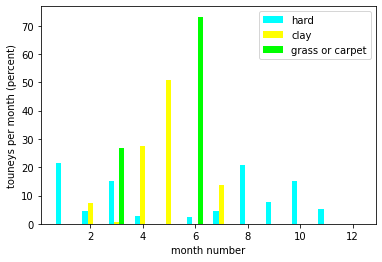

In [ ]:
wid = 0.2  # ширина столбца

x = [i for i in range(1, 13)]  # координаты по оси абсцисс для грунтового покрытия как есть
# для твердого и травяного + коврового нужно пересчитать, чтобы столбцы не налезли друг на друга
x1 = [x[i] - wid for i in range(len(x))]
x2 = [x[i] + wid for i in range(len(x))]

# формирование и отрисовка гистограмм
plt.bar(x1, lst_by_month_surface_hard, width=wid, label="hard", color='cyan')
plt.bar(x, lst_by_month_surface_clay, width=wid, label="clay", color='yellow')
plt.bar(x2, lst_by_month_surface_grass_or_carpet, width=wid, label="grass or carpet", color=(0, 1, 0))
plt.plot()

plt.xlabel("month number")
plt.ylabel("touneys per month (percent)")
plt.legend()
plt.show()

# 7. Сгруппировать данные (GroupBy) по некоторому признаку и сохранить результаты в новые таблицы. Для каждой новой таблицы провести сортировку по сложному ключу, состоящему из нескольких признаков. Для каждой таблицы своя сортировка.

Первая таблица. Группируем по поверхности и уровню турнира.

In [ ]:
df_first_table_7 = df.groupby(['surface', 'tourney_level']).aggregate(['count'])['tourney_id']#, 'min', 'mean', np.median, 'max'])

Сортируем сначала по первому признаку, затем по второму

In [ ]:
df_first_table_7.sort_values(by=['surface', 'tourney_level'])

count
surface tourney_level       
Carpet  D                 20
        T1                52
        T2               108
        T3                58
        W                 15
Clay    D                103
        G                124
        T1               162
        T2                82
        T3               144
        T4               242
Grass   CC                86
        G                124
        T2                27
        T3                84
Hard    D                 33
        G                254
        O                 62
        T1               256
        T2               241
        T3               115
        T4               183

Вторая таблица. Группируем по уровню турнира и по названию.

In [ ]:
df_second_table_7 = df.groupby(['tourney_level', 'tourney_name']).aggregate(['count'])['tourney_id']#, 'min', 'mean', np.median, 'max'])

Сортируем по имени турнира, переведенному в нижний регистр, в порядке убывания.

In [ ]:
df_second_table_7.sort_values(by=['tourney_name'], ascending=False, key=lambda col: col.str.lower())

count
tourney_level tourney_name                 
T1            Zurich                     27
W             WTA Tour Championships     15
G             Wimbledon                 124
T4            Warsaw                     30
CC            Victoria 4 10K             26
...                                     ...
G             Australian Open           127
T4            Auckland                   31
              Antwerp                    30
T2            Amelia Island              55
T3            's-Hertogenbosch           29

[154 rows x 1 columns]

# 8. Выдвинуть и проверить или опровергнуть гипотезы о структуре и зависимостях в исследуемых данных, визуализировать результаты.

**Гипотеза 1. Возраст участниц таких соревнований варьируется примерно от 16 до 35 лет.**

Посчитаем количество победителей в каждом возрасте.

In [ ]:
df_winner_age_8 = df.groupby('winner_age').aggregate('count')['tourney_id']

Посчитаем количество проигравших в каждом возрасте.

In [ ]:
df_loser_age_8 = df.groupby('loser_age').aggregate('count')['tourney_id']

Визуализируем полученные данные.

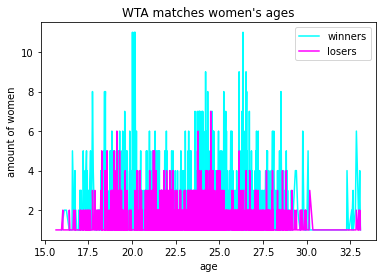

In [ ]:
plt.plot(df_winner_age_8, color='cyan',  label="winners")
plt.plot(df_loser_age_8, color='magenta',  label="losers")

plt.xlabel("age")
plt.ylabel("amount of women")
plt.title("WTA matches women's ages")
plt.legend()

plt.show()

**Вывод.** В самом деле, самым молодым участницам 15 лет, но их не очень много - вероятно, девушки только начинают спортивную карьеру, пробуют себя на серьезных соревнованиях. Самым старшим участницам примерно 33-34 года, как и предполагалось.

**Гипотеза 2. Наиболее часто встречающийся вид поверхности - хард, так как корты с таким покрытием всепогодны, могут использоваться как снаружи, так и внутри помещений, достаточно просто ремонтируются, практически не требуют регулярного ухода.**

Посчитаем количество турниров, проводившихся на поверхности каждого типа, и отсортируем полученные данные по убыванию.

In [ ]:
df_surface_8 = df.groupby('surface').aggregate('count').sort_values(by='tourney_id', ascending=False)['tourney_id']

Представим в виде круговой диаграммы.

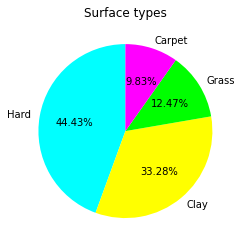

In [ ]:
labels_ = df['surface'].unique()
colors_ = [(0, 1, 1), (1, 1, 0), (0, 1, 0), (1, 0, 1)]

plt.pie(df_surface_8, labels=labels_, colors=colors_,
        startangle=90,
        autopct='%1.2f%%')

plt.title('Surface types')
plt.show()

**Вывод.** В самом деле, хард - самое популярное покрытие. Почти половина турниров проводилась на таких кортах.